<a href="https://colab.research.google.com/github/condor68mihon/InformationTheory/blob/master/05_07_Conjugacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.set_printoptions(legacy='1.25')
import matplotlib.pyplot as plt

# Сопряженные распределения



## Биномиальное и бета-распределение

### Семейство бета-распределений

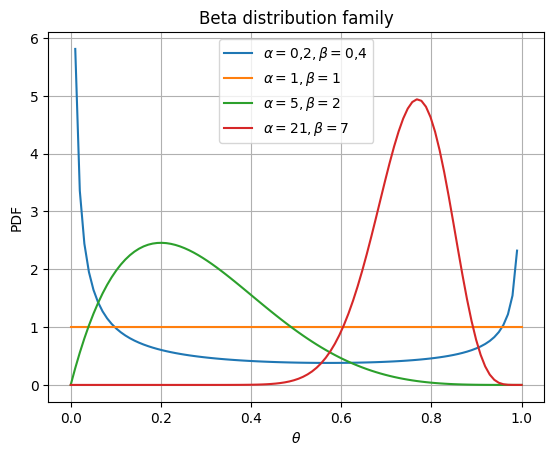

In [ ]:
from scipy.stats import beta, binom
theta = np.linspace(0, 1, 100)

plt.plot(theta, beta.pdf(theta, 0.2, 0.4), label = r'$\alpha = 0{,}2, \beta = 0{,}4$')
plt.plot(theta, beta.pdf(theta, 1, 1), label = r'$\alpha = 1, \beta = 1$')
plt.plot(theta, beta.pdf(theta, 2, 5), label = r'$\alpha = 5, \beta = 2$')
plt.plot(theta, beta.pdf(theta, 21, 7), label = r'$\alpha = 21, \beta = 7$')
plt.legend()
plt.title(r'Beta distribution family')
plt.xlabel(r'$\theta$')
plt.ylabel('PDF')
plt.grid()
plt.show()

### Сопряженные бета- и биномиальное распределения

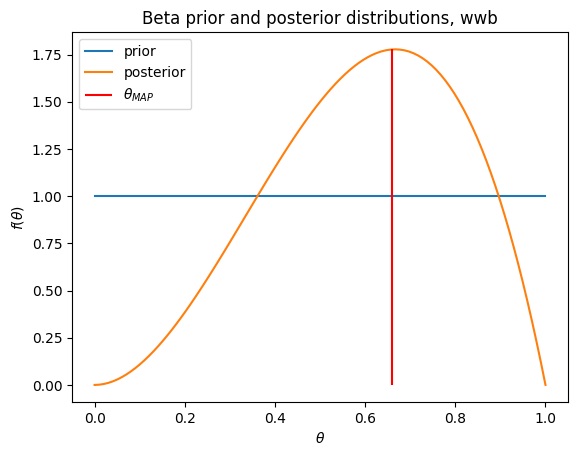

In [ ]:
# сохраним параметры априорного распределения
a, b = 1, 1
# и биномиального испытания
k, n = 2, 3

# найдем априорное и апостериорное бета-распределения
prior = beta.pdf(theta, a, b)
posterior = beta.pdf(theta, a+k, b+n-k)

# выведем эти распределения
plt.plot(theta, prior, label = 'prior')
plt.plot(theta, posterior, label = 'posterior')

# найдем апостериорный максимум
plt.vlines(x = posterior.argmax()/len(theta), ymin = 0, ymax = 1.78,
           colors = 'r', label = r'$\theta_{MAP}$')

plt.title('Beta prior and posterior distributions, wwb')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.show()

In [ ]:
1 - beta.cdf(0.5, a+k, b+n-k)

0.6875

### Бета-биномиальное распределение

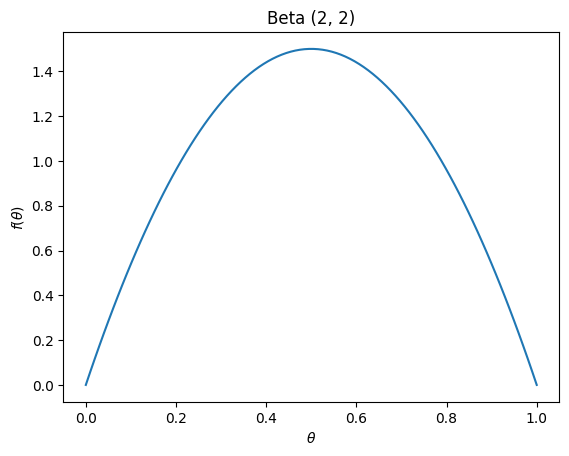

In [ ]:
plt.plot(theta, beta.pdf(theta, 2, 2), label = r'')
plt.title('Beta (2, 2)')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show()

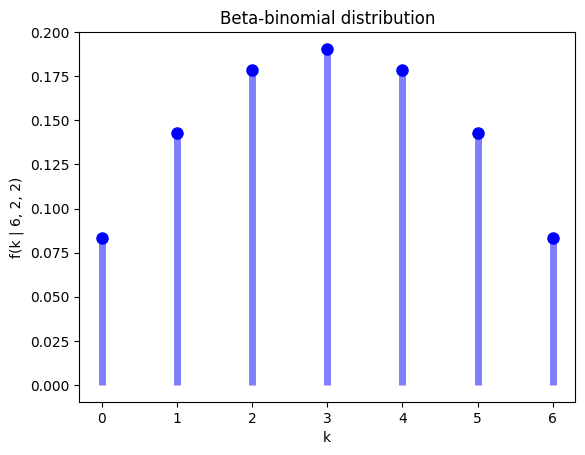

In [ ]:
from scipy.stats import betabinom

n, a, b = 6, 2, 2
k = np.arange(n+1)

plt.plot(k, betabinom.pmf(k, n, a, b), 'bo', ms=8)
plt.vlines(k, 0, betabinom.pmf(k, n, a, b), colors = 'b', lw = 5, alpha=0.5)
plt.title('Beta-binomial distribution')
plt.xlabel('k')
plt.ylabel('f(k | 6, 2, 2)')
plt.show()

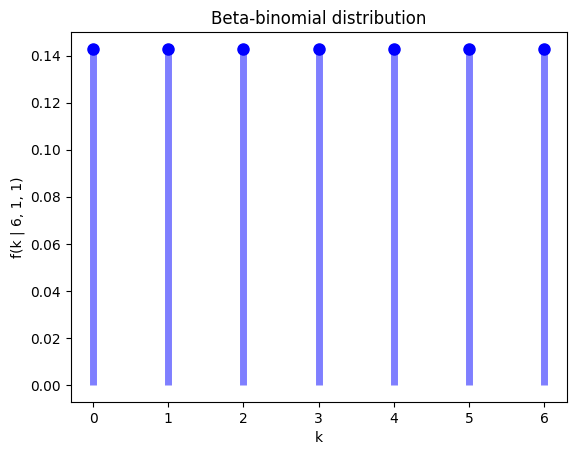

In [ ]:
n, a, b = 6, 1, 1
k = np.arange(n+1)

plt.plot(k, betabinom.pmf(k, n, a, b), 'bo', ms=8)
plt.vlines(k, 0, betabinom.pmf(k, n, a, b), colors = 'b', lw = 5, alpha=0.5)
plt.title('Beta-binomial distribution')
plt.xlabel('k')
plt.ylabel('f(k | 6, 1, 1)')
plt.show()

### Распространенность заболевания

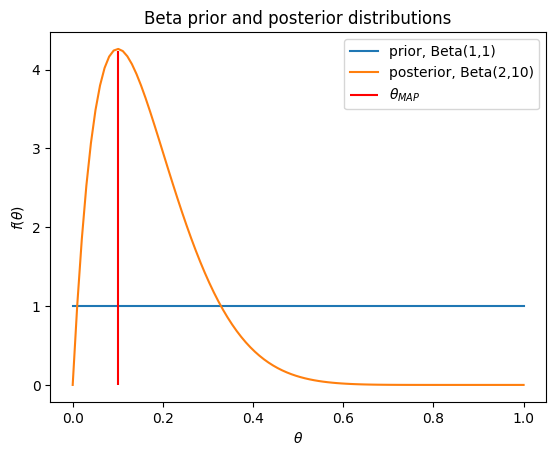

In [ ]:
# сохраним параметры априорного распределения
a, b = 1, 1
# и биномиального испытания
k, n = 1, 10

# найдем априорное и апостериорное бета-распределения
prior = beta.pdf(theta, a, b)
posterior = beta.pdf(theta, a+k, b+n-k)

# выведем эти распределения
plt.plot(theta, prior, label = 'prior, Beta(1,1)')
plt.plot(theta, posterior, label = 'posterior, Beta(2,10)')

# найдем апостериорный максимум
plt.vlines(x = k/n, ymin = 0, ymax = 4.23, colors = 'r', label = r'$\theta_{MAP}$')

plt.title('Beta prior and posterior distributions')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.show()

### Мода априорного и апостериорного распределений

In [ ]:
# импортируем функцию для расчета биномиального коэффициента
from math import comb

# сохраним параметры априорного распределения
a, b = 2, 2
# и биномиального испытания
k, n = 1, 10

# найдем априорный максимум,
theta_max_prior = (a-1)/((a-1)+(b-1))
# максимальное правдоподобие и
max_likelihood = k/n
# апостериорный максимум
theta_max_posterior = (k+(a-1)) / (n+(a-1)+(b-1))

theta_max_prior, max_likelihood, theta_max_posterior

(0.5, 0.1, 0.16666666666666666)

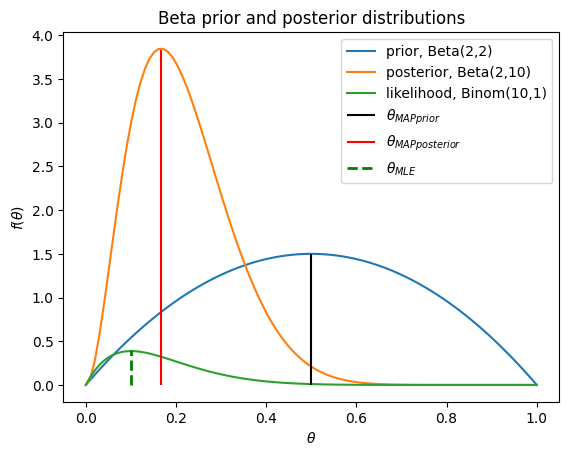

In [ ]:
# создадим априорное и апостериорное бета-распределения, а также
# функцию правдоподобия
prior = beta.pdf(theta, a, b)
posterior = beta.pdf(theta, a+k, b+n-k)
likelihood = comb(10, 1) * theta**k * (1-theta)**(n-k)

# выведем эти распределения
plt.plot(theta, prior, label = 'prior, Beta(2,2)')
plt.plot(theta, posterior, label = 'posterior, Beta(2,10)')
plt.plot(theta, likelihood, label = 'likelihood, Binom(10,1)')

# найдем апостериорный максимум
plt.vlines(x = theta_max_prior, ymin = 0, ymax = 1.5, colors = 'k', label = r'$\theta_{MAP prior}$')
plt.vlines(x = theta_max_posterior, ymin = 0, ymax = 3.83, colors = 'r', label = r'$\theta_{MAP posterior}$')
plt.vlines(x = max_likelihood, ymin = 0, ymax = 0.4, colors = 'g', linestyles = '--', lw = 2, label = r'$\theta_{MLE}$')

plt.title('Beta prior and posterior distributions')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.show()

### Априорное предсказательное распределение

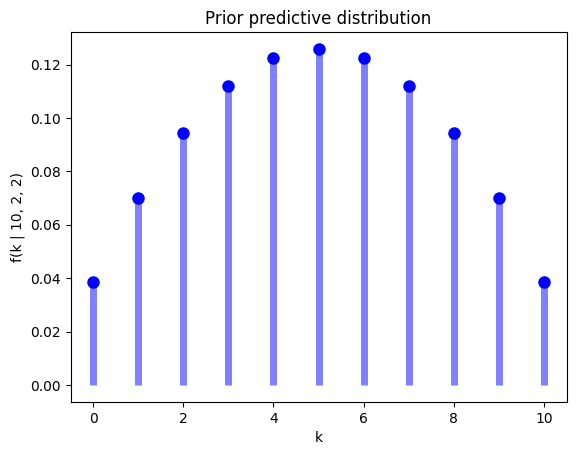

In [ ]:
n, a, b = 10, 2, 2
k = np.arange(n+1)

plt.plot(k, betabinom.pmf(k, n, a, b), 'bo', ms=8)
plt.vlines(k, 0, betabinom.pmf(k, n, a, b), colors = 'b', lw = 5, alpha=0.5)
plt.title('Prior predictive distribution')
plt.xlabel('k')
plt.ylabel('f(k | 10, 2, 2)')
plt.show()

In [ ]:
betabinom.mean(n, a, b)

5.0

In [ ]:
# вероятность того, что заболело не более одного человека
betabinom.cdf(1, n, a, b)

0.10839160839160833

### Апостериорное предсказательное распределение

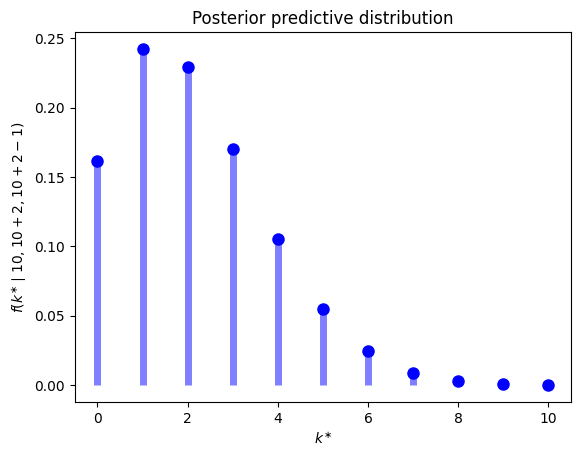

In [ ]:
# изначальные параметры (a, b)
a, b = 2, 2
# изначальные данные (X)
n, k = 10, 1
# новые параметры (a', b')
a_prime, b_prime = a + k, n + b - k
# новые данные (X')
n_ast = 10
k_ast = np.arange(n_ast+1)

plt.plot(k_ast, betabinom.pmf(k_ast, n_ast, a_prime, b_prime), 'bo', ms=8)
plt.vlines(k_ast, 0, betabinom.pmf(k_ast, n_ast, a_prime, b_prime), colors = 'b', lw = 5, alpha=0.5)
plt.title('Posterior predictive distribution')
plt.xlabel(r'$k^{\ast}$')
plt.ylabel(r'$f(k^{\ast} \mid 10, 10 + 2, 10 + 2 - 1)$')
plt.show()

In [ ]:
betabinom.mean(n_ast, a_prime, b_prime)

2.142857142857143

In [ ]:
# вероятность того, что заболело не более одного человека
betabinom.cdf(1, n_ast, a_prime, b_prime)

0.40372670807453415

## Нормальные распределения

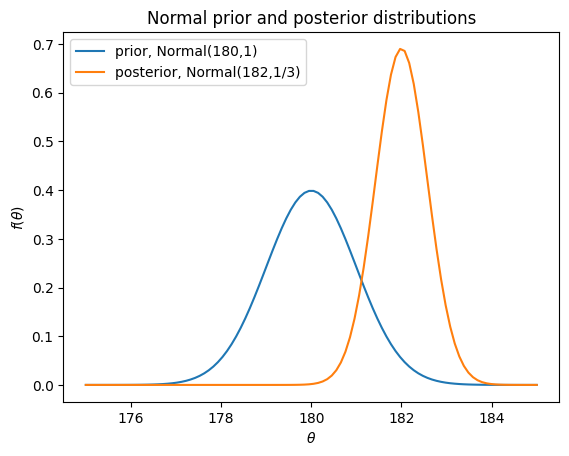

In [ ]:
from scipy.stats import norm
theta = np.linspace(175, 185, 100)

# не забудем, что функция norm.pdf() вторым параметром
# принимает СКО, а не дисперсию
prior = norm.pdf(theta, 180, np.sqrt(1))
posterior = norm.pdf(theta, 182, np.sqrt(1/3))

plt.plot(theta, prior, label = 'prior, Normal(180,1)')
plt.plot(theta, posterior, label = 'posterior, Normal(182,1/3)')

plt.title('Normal prior and posterior distributions')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')

plt.legend()
plt.show()

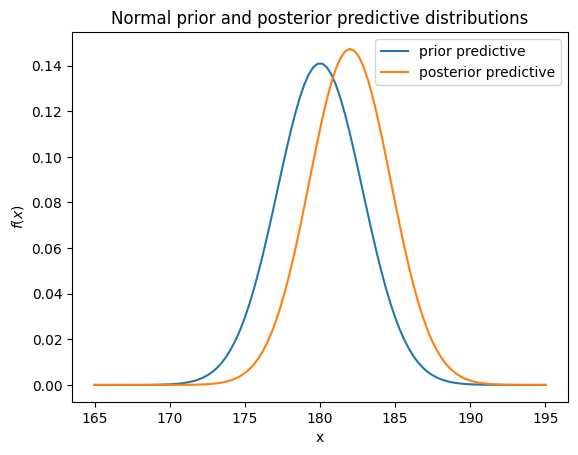

In [ ]:
theta = np.linspace(165, 195, 100)

prior_predictive = norm.pdf(theta, 180, np.sqrt(7+1))
posterior_predictive = norm.pdf(theta, 182, np.sqrt(7+1/3))

plt.plot(theta, prior_predictive, label = 'prior predictive')
plt.plot(theta, posterior_predictive, label = 'posterior predictive')

plt.title('Normal prior and posterior predictive distributions')
plt.xlabel(r'x')
plt.ylabel(r'$f(x)$')

plt.legend()
plt.show()

## Распределение Пуассона и гамма-распределение

### Распределение Пуассона

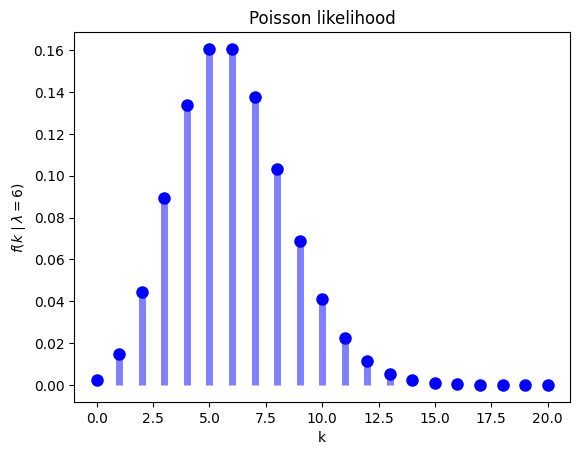

In [ ]:
from scipy.stats import poisson

n, mu = 20, 6
k = np.arange(n+1)

plt.plot(k, poisson.pmf(k, mu), 'bo', ms=8)
plt.vlines(k, 0, poisson.pmf(k, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson likelihood')
plt.xlabel('k')
plt.ylabel(r'$f(k \mid \lambda = 6)$')
plt.show()

In [ ]:
lambda_, t = 6, 0.5
mu = lambda_ * t

poisson.pmf(2, mu)

0.22404180765538775

### Экспоненциальное распределение

#### Параметры распределения

In [ ]:
from scipy.stats import expon

lambda_ = 6
b = 1/lambda_

expon.cdf(0.05, scale = b)

0.2591817793182822

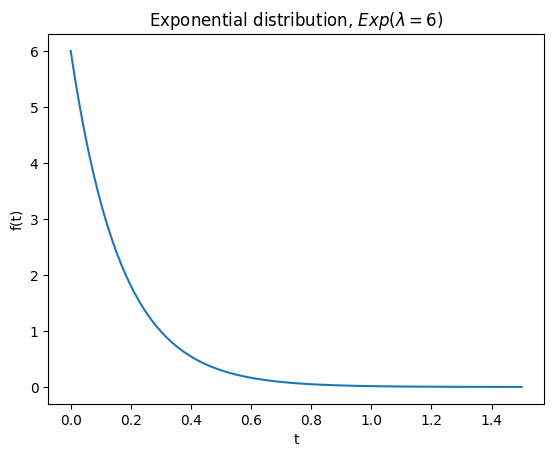

In [ ]:
t = np.linspace(0, 1.5, 100)
plt.plot(t, expon.pdf(t, scale = b));
plt.title(r'Exponential distribution, $Exp(\lambda = 6)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

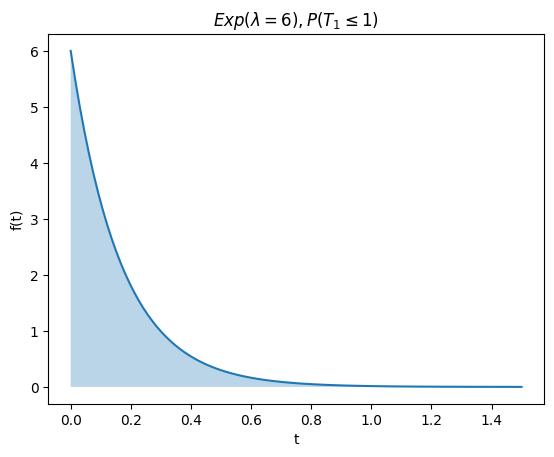

In [ ]:
t = np.linspace(0, 1.5, 100)
fill_t = np.linspace(0, 1.5, 100)
plt.plot(t, expon.pdf(t, scale = b))
plt.fill_between(fill_t, expon.pdf(fill_t, scale = b), alpha = 0.3)
plt.title(r'$Exp(\lambda = 6), P(T_1 \leq 1)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

In [ ]:
from scipy.integrate import quad
quad(expon.pdf, 0, 1, args = (0, 1/6))[0]

0.9975212478233336

In [ ]:
time = [1/6, 1/2, 1]

for t_period in time:
  print(expon.cdf(t_period, scale = b))

0.6321205588285577
0.950212931632136
0.9975212478233336


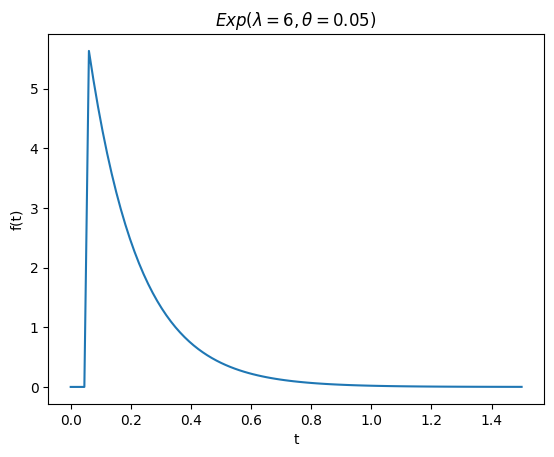

In [ ]:
t = np.linspace(0, 1.5, 100)
plt.plot(t, expon.pdf(t, loc = 0.05, scale = b))
plt.title(r'$Exp(\lambda = 6, \theta = 0.05)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

In [ ]:
theta = 0.05

for t_period in time:
  print(expon.cdf(t_period, loc = theta, scale = b))

0.5034146962085905
0.9327944872602503
0.9966540345425288


#### Геометрическое распределение

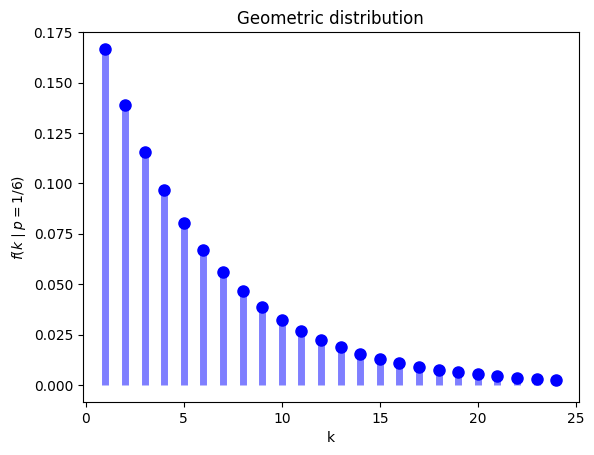

In [ ]:
from scipy.stats import geom

p = 1/6
k = np.arange(1, 25)

plt.plot(k, geom.pmf(k, p), 'bo', ms=8)
plt.vlines(k, 0, geom.pmf(k, p), colors='b', lw=5, alpha=0.5)
plt.title('Geometric distribution')
plt.xlabel('k')
plt.ylabel(r'$f(k \mid p = 1/6)$')
plt.show()

In [ ]:
geom.cdf(5, p)

0.5981224279835391

In [ ]:
geom.mean(p)

6.0

#### Свойство отсутствия памяти

Геометрическое распределение

In [ ]:
a, b = 5, 10

# P(X > a + b)
numerator = 1-geom.cdf(a+b, p)

# P(X > a)
denominator = 1-geom.cdf(a, p)

numerator/denominator

0.16150558288984576

In [ ]:
# P(X > b)
1-geom.cdf(b, p)

0.16150558288984573

Экспоненциальное распределение

In [ ]:
lambda_ = 6

# 3 min и 9 min
a, b = 0.05, 0.15

# P(X > a + b) / P(X > a)
(1-expon.cdf(a+b, scale = 1/lambda_))/(1-expon.cdf(a, scale = 1/lambda_))

0.406569659740599

In [ ]:
# P(X > b)
1-expon.cdf(b, scale = 1/lambda_)

0.4065696597405991

#### Распределение Вейбулла

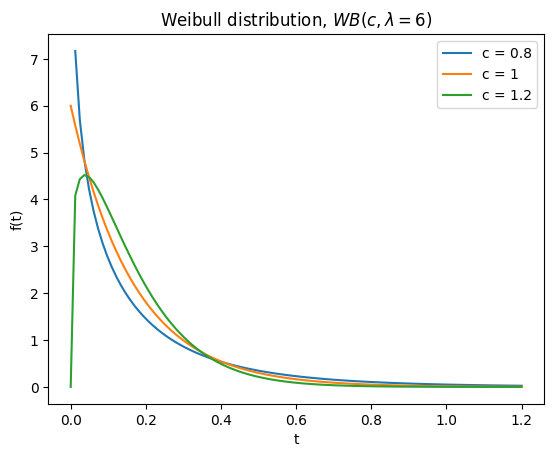

In [ ]:
%%capture --no-display

from scipy.stats import weibull_min

c1, c2, c3 = 0.8, 1, 1.2
lambda_ = 6

# scale = 1/lambda
t = np.linspace(0, 1.2, 100)
plt.plot(t, weibull_min.pdf(t, c1, scale=1/lambda_), label = 'c = {}'.format(c1))
plt.plot(t, weibull_min.pdf(t, c2, scale=1/lambda_), label = 'c = {}'.format(c2))
plt.plot(t, weibull_min.pdf(t, c3, scale=1/lambda_), label = 'c = {}'.format(c3))
plt.title(r'Weibull distribution, $WB(c, \lambda = 6)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [ ]:
def failure_rate(t, c, shape):
  return (shape * c) * (shape * t) ** (c-1)

time = [0.1, 0.5, 1]

# интенсивность отказов при с < 1
for t in time:
  print(failure_rate(t, c1, 1 / lambda_))

0.3023910873688072
0.21916691060229673
0.1907958774807007


In [ ]:
# интенсивность отказов при с = 1
for t in time:
  print(failure_rate(t, c2, 1 / lambda_))

0.16666666666666666
0.16666666666666666
0.16666666666666666


In [ ]:
# интенсивность отказов при с > 1
for t in time:
  print(failure_rate(t, c3, 1 / lambda_))

0.08818602062217205
0.12167286837864116
0.13976542375431586


### Время ожидания k-ого события

#### Распределение Эрланга

In [ ]:
from scipy.stats import erlang

t, k, lambda_ = 0.25, 3, 6

erlang.cdf(t, k, scale=1/lambda_)

0.19115316946194183

#### Гамма-распределение

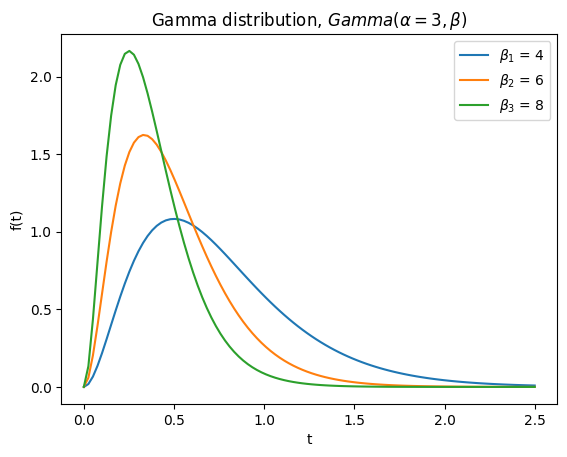

In [ ]:
from scipy.stats import gamma

t = np.linspace(0, 2.5, 100)
a = 3
b1, b2, b3 = 4, 6, 8

plt.plot(t, gamma.pdf(t, a, scale = 1/b1), label = r'$\beta_1$ = {}'.format(b1))
plt.plot(t, gamma.pdf(t, a, scale = 1/b2), label = r'$\beta_2$ = {}'.format(b2))
plt.plot(t, gamma.pdf(t, a, scale = 1/b3), label = r'$\beta_3$ = {}'.format(b3))
plt.title(r'Gamma distribution, $Gamma(\alpha = 3, \beta)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [ ]:
for b in [b3, b2, b1]:
  print(gamma.cdf(1, a, scale = 1/b))

0.986246032255997
0.938031195583341
0.7618966944464556


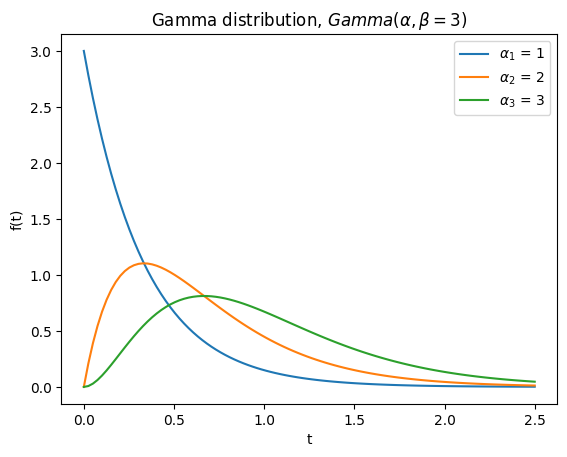

In [ ]:
a1, a2, a3 = 1, 2, 3
b = 3

plt.plot(t, gamma.pdf(t, a1, scale = 1/b), label = r'$\alpha_1$ = {}'.format(a1))
plt.plot(t, gamma.pdf(t, a2, scale = 1/b), label = r'$\alpha_2$ = {}'.format(a2))
plt.plot(t, gamma.pdf(t, a3, scale = 1/b), label = r'$\alpha_3$ = {}'.format(a3))
plt.title(r'Gamma distribution, $Gamma(\alpha, \beta = 3)$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

In [ ]:
for a in [a1, a2, a3]:
  print(gamma.cdf(1, a, scale = 1/b))

0.950212931632136
0.8008517265285442
0.5768099188731566


### Сопряженность распределений

In [ ]:
a, b = 10, 2

data = np.array([5, 3, 3, 1])
mean_k, n = data.mean(), len(data)
mean_k, n

(3.0, 4)

In [ ]:
from math import factorial

def pois_likelihood(lambda_, data, scaling):
  sum_k = np.sum(data)
  n = len(data)

  numerator = lambda_ ** sum_k * np.exp(-n * lambda_)

  denominator = 1
  for k in data:
    denominator *= factorial(k)

  # коэффициент масштабирования scaling позволяет вывести
  # правдоподобие на одном графике с априорной и
  # апостериорной вероятностью
  return (numerator/denominator) * scaling

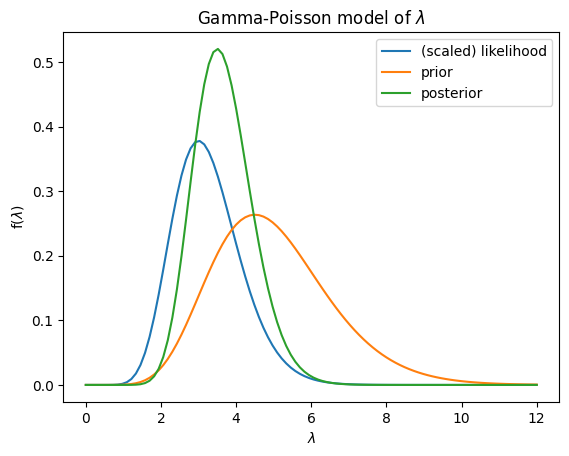

In [ ]:
lambda_ = np.linspace(0, 12, 100)
plt.plot(lambda_, pois_likelihood(lambda_, data, 500),
         label = '(scaled) likelihood')
plt.plot(lambda_, gamma.pdf(lambda_, a, scale = 1/b),
         label = 'prior')
plt.plot(lambda_, gamma.pdf(lambda_, (mean_k * n) + a, scale = 1/(b + n)),
         label = 'posterior')

plt.title(r'Gamma-Poisson model of $\lambda $')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'f($\lambda$)')
plt.legend()
plt.show()

In [ ]:
# среднее и дисперсия априорного распределения
gamma.stats(a, scale = 1/b, moments = 'mv')

(5.0, 2.5)

In [ ]:
# среднее и дисперсия апостериорного распределения
gamma.stats((mean_k * n) + a, scale = 1/(b + n), moments = 'mv')

(3.6666666666666665, 0.611111111111111)

### Предсказательные распределения

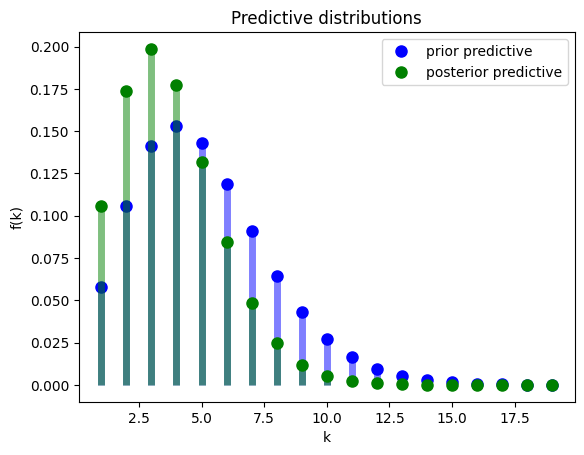

In [ ]:
from scipy.stats import nbinom

# зададим параметры априорного распределения, а также
a, b = 10, 2

# количество наблюдений и их среднее значение
data = np.array([5, 3, 3, 1])
n, k_bar = len(data), data.mean()

# укажем, какие значения k и k' нас интересуют
k = np.arange(1, 20)

# изменим параметризацию априорного предсказательного распределения
r, p = a, b / (b + 1)
plt.plot(k, nbinom.pmf(k, r, p), 'bo', ms=8, label = 'prior predictive')
plt.vlines(k, 0, nbinom.pmf(k, r, p), colors='b', lw=5, alpha=0.5)

# изменим параметризацию апостериорного предсказательного распределения
r_post, p_post = k_bar * n + a, (n + b)/(n + b + 1)
plt.plot(k, nbinom.pmf(k, r_post, p_post), 'go', ms=8, label = 'posterior predictive')
plt.vlines(k, 0, nbinom.pmf(k, r_post, p_post), colors='g', lw=5, alpha=0.5)

plt.title('Predictive distributions')
plt.xlabel('k')
plt.ylabel('f(k)')
plt.legend()
plt.show()

In [ ]:
# среднее и дисперсия априорного предсказательного распределения
nbinom.stats(r, p, moments = 'mv')

(5.000000000000001, 7.500000000000002)

In [ ]:
# среднее и дисперсия апостериорного предсказательного распределения
nbinom.stats(r_post, p_post, moments = 'mv')

(3.6666666666666683, 4.27777777777778)